In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [14]:
def createTree(trainingData, criterion="entropy"):
    data = trainingData.iloc[:, :-1]  # Feature matrix
    labels = trainingData.iloc[:, -1]  # Labels
    trainedTree = tree.DecisionTreeClassifier(criterion=criterion)  # Use criterion argument
    trainedTree.fit(data, labels)
    return trainedTree

In [15]:
def showtree2pdf_matplotlib(trainedTree, feature_names, class_names, filename):
    plt.figure(figsize=(12,8))
    tree.plot_tree(
        trainedTree,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.savefig(filename)
    plt.close()
    print(f"Decision tree saved as {filename}")

In [17]:
def data2vectoc(data):
    names = data.columns[:-1]
    for i in names:
        col = pd.Categorical(data[i])
        data[i] = col.codes
    # Convert the label column too
    data[data.columns[-1]] = pd.Categorical(data[data.columns[-1]]).codes
    return data

In [16]:
def showtree_matplotlib(trainedTree, feature_names, class_names, filename=None):
    plt.figure(figsize=(12,8))
    tree.plot_tree(
        trainedTree,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=10
    )
    if filename:
        plt.savefig(filename)
        print(f"Decision tree saved as {filename}")
    plt.show()

Decision tree saved as tennis_gini.pdf


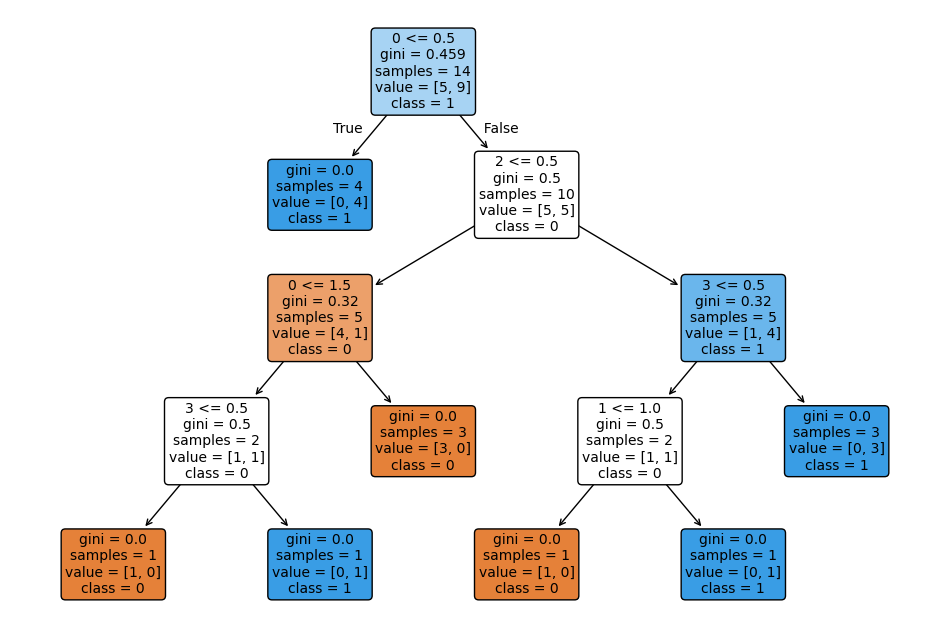

In [18]:
data = pd.read_table("C:\\Users\\user\\Downloads\\Dataset\\ML\\tennis.txt", header=None, sep='\t')
trainingvec = data2vectoc(data)

# Create the decision tree with Gini criterion
decisionTree_gini = createTree(trainingvec, criterion="gini")

# Prepare feature and class names
feature_names = data.columns[:-1].astype(str)  # feature names
class_names = [str(cls) for cls in pd.Categorical(data.iloc[:, -1]).categories]  # class names

# Show and save the tree
showtree_matplotlib(decisionTree_gini, feature_names, class_names, filename="tennis_gini.pdf")


In [19]:
testVec = [0, 0, 1, 1]  # Example input
prediction = decisionTree.predict(np.array(testVec).reshape(1, -1))
print("Predicted class with Gini criterion:", prediction[0])

Predicted class with Gini criterion: 1
